<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library-import" data-toc-modified-id="Library-import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library import</a></span></li><li><span><a href="#Practical-Assignment-1,-Due-Date:-16-April-2021-at-23:59" data-toc-modified-id="Practical-Assignment-1,-Due-Date:-16-April-2021-at-23:59-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Practical Assignment 1, Due Date: 16 April 2021 at 23:59</a></span><ul class="toc-item"><li><span><a href="#Approach-1" data-toc-modified-id="Approach-1-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Approach 1</a></span></li><li><span><a href="#Aproach-2" data-toc-modified-id="Aproach-2-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Aproach 2</a></span></li></ul></li></ul></div>

## Library import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Practical Assignment 1, Due Date: 16 April 2021 at 23:59
Create a python class with the following objectives:
- A method for creating a design matrix for a feature vector x
- A method for learning the parameters of the model
- A method for predicting target values given input values x using two methods:<br>
    OLS <br>
    MLE <br>
- A plotting method for a fitted line and 1 standard division for denoting uncertainties with the MLE method.
- Your class should allow the user to specify a method of interest e.g. "OLS" or "MLE"

### Approach 1
Input: (x, y, method)

In [2]:
class Regression():
    """ 
    A Simple Linear Regression Model Class:
    Class Attributes:
    x: Independent Variable Input
    y: Dependent Variable Input
    method: Select 'OLS' or 'MLE'
    Class Functions:
    designMatrix(): Outputs X n*2 matrix of ones and independent variable inputs
    learnParameter(): Outputs b_0 and b_1 and regression equation
    fitPlot(): Outputs the line of best fit plot 
    pred(): Takes input and outputs predicted value 
    Use Sequence:
    1:designMatrix(), 2:learnParameter(), 3:fitPlot(), 4:pred()
    """
    def __init__(self, x, y, method):
        self.x = x
        self.y = y
        self.method = method
    
    def designMatrix(self):
        if self.method == 'OLS' or self.method == 'MLE':
            global X, Y, mat_len
            mat_len = len(self.x) # matrix lenght (same as n)
            X = np.matrix([np.ones(mat_len), self.x]).T; # design matrix
            Y = np.matrix(self.y).T
            return X
        else:
            print("Please select 'OLS' or 'MLE' as the correct Method")
    
    def learnParameter(self):
        global l_par, σ_square
        if self.method == 'OLS':
            l_par = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y) # learning parameters
            print("Estimated coefficients:\nβ_0 = {}  \
              \nβ_1 = {}".format(l_par[0], l_par[1]))
            print("Equation: y_bar = {} + {}x".format(l_par[0], l_par[1]))
        elif self.method == 'MLE':
            l_par = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y) 
            # σ^2 = 1/n*(y-Xθ)^T(y-Xθ)  
            # σ_square = (1/mat_len)*((Y - X.dot(l_par)).T.dot(Y - X.dot(l_par)) : Used formula
            σ_square = np.array((1/mat_len)*((Y - X.dot(l_par)).T.dot(Y - X.dot(l_par)))).flatten() # sigma^2
            print("Estimated coefficients:\nβ_0 = {}  \
              \nβ_1 = {}".format(l_par[0], l_par[1]))
            print("σ^2 = {}".format(σ_square))
            print("Equation: y_bar ~ N({} + {}x; {})".format(l_par[0], l_par[1], σ_square))
        else:
            print("Please select 'OLS' or 'MLE' as the correct Method")
            
            
    
    def fitPlot(self):
        if self.method == 'OLS':
            y_pred = l_par[0] + l_par[1] * self.x # y_bar = b0 + b1x
            plt.plot(np.array(self.x), np.array(y_pred).flatten(), color='r',
                    label='y_bar = {} + {}x'.format(np.array(l_par[0]).flatten(), np.array(l_par[1]).flatten()));
            plt.plot(self.x, self.y, '.', color = 'b');
            plt.xlabel('x');
            plt.ylabel('y');
            plt.legend(loc = "upper left");
        elif self.method == 'MLE':
            y_pred = l_par[0] + l_par[1] * self.x
            y_pred_up = (l_par[0] + l_par[1] * self.x) + σ_square**(1/2) # Uncertainity 
            y_pred_down = (l_par[0] + l_par[1] * self.x) - σ_square**(1/2) # Uncertainity 
            plt.plot(np.array(self.x), np.array(y_pred).flatten(), color='r',
                    label='y_bar = {} + {}x'.format(np.array(l_par[0]).flatten(), np.array(l_par[1]).flatten()));
            plt.plot(self.x, self.y, '.', color = 'b');
            plt.plot(np.array(self.x), np.array(y_pred_up).flatten(), color='k',
                    label='+/- {} Std of Uncertainties'.format(σ_square**(1/2)));
            plt.plot(np.array(self.x), np.array(y_pred_down).flatten(), color='k');
            plt.xlabel('x');
            plt.ylabel('y');
            plt.legend(loc = "upper left"); 
        else:
            print("Please select 'OLS' or 'MLE' as the correct Method")
            
    
    def pred(self, val):
        """
        Input independent variables for prediction 
        Input single or multiple values for single or multiple values output
        val: Input values x
        """
        if self.method == 'OLS':
            return np.array(l_par[0] + l_par[1] * val).flatten() 
        elif self.method == 'MLE':
            return np.array(np.random.normal(l_par[0] + l_par[1] * val,σ_square**(1/2))).flatten()
        else:
            print("Please select 'OLS' or 'MLE' as the correct Method")

In [3]:
help(Regression)

Help on class Regression in module __main__:

class Regression(builtins.object)
 |  Regression(x, y, method)
 |  
 |  A Simple Linear Regression Model Class:
 |  Class Attributes:
 |  x: Independent Variable Input
 |  y: Dependent Variable Input
 |  method: Select 'OLS' or 'MLE'
 |  Class Functions:
 |  designMatrix(): Outputs X n*2 matrix of ones and independent variable inputs
 |  learnParameter(): Outputs b_0 and b_1 and regression equation
 |  fitPlot(): Outputs the line of best fit plot 
 |  pred(): Takes input and outputs predicted value 
 |  Use Sequence:
 |  1:designMatrix(), 2:learnParameter(), 3:fitPlot(), 4:pred()
 |  
 |  Methods defined here:
 |  
 |  __init__(self, x, y, method)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  designMatrix(self)
 |  
 |  fitPlot(self)
 |  
 |  learnParameter(self)
 |  
 |  pred(self, val)
 |      Input independent variables for prediction 
 |      Input single or multiple values for single or multiple values

In [4]:
# Test data 
x = [29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50] # Study hours
y = [65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100] # Test results
#x = np.random.random((100))
#y = np.random.random((100))

In [5]:
r_ols = Regression(x, y, 'OLS')

In [6]:
r_mle = Regression(x,y, 'MLE')

In [7]:
r_ols.designMatrix()

matrix([[ 1., 29.],
        [ 1.,  9.],
        [ 1., 10.],
        [ 1., 38.],
        [ 1., 16.],
        [ 1., 26.],
        [ 1., 50.],
        [ 1., 10.],
        [ 1., 30.],
        [ 1., 33.],
        [ 1., 43.],
        [ 1.,  2.],
        [ 1., 39.],
        [ 1., 15.],
        [ 1., 44.],
        [ 1., 29.],
        [ 1., 41.],
        [ 1., 15.],
        [ 1., 24.],
        [ 1., 50.]])

In [8]:
r_mle.designMatrix()

matrix([[ 1., 29.],
        [ 1.,  9.],
        [ 1., 10.],
        [ 1., 38.],
        [ 1., 16.],
        [ 1., 26.],
        [ 1., 50.],
        [ 1., 10.],
        [ 1., 30.],
        [ 1., 33.],
        [ 1., 43.],
        [ 1.,  2.],
        [ 1., 39.],
        [ 1., 15.],
        [ 1., 44.],
        [ 1., 29.],
        [ 1., 41.],
        [ 1., 15.],
        [ 1., 24.],
        [ 1., 50.]])

In [9]:
r_ols.learnParameter()

Estimated coefficients:
β_0 = [[-3.9057602]]                
β_1 = [[2.01467487]]
Equation: y_bar = [[-3.9057602]] + [[2.01467487]]x


In [10]:
r_mle.learnParameter()

Estimated coefficients:
β_0 = [[-3.9057602]]                
β_1 = [[2.01467487]]
σ^2 = [114.60634226]
Equation: y_bar ~ N([[-3.9057602]] + [[2.01467487]]x; [114.60634226])


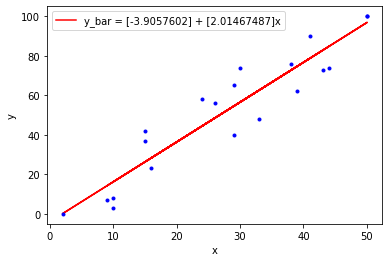

In [11]:
r_ols.fitPlot()

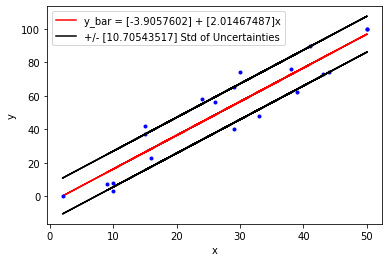

In [12]:
r_mle.fitPlot()

In [13]:
# Outputs from original data
# [2, 30, 50, 60]
# [0, 74, 100, ?]

In [14]:
r_ols.pred([2,30,50,60])

array([  0.12358955,  56.53448595,  96.82798338, 116.97473209])

In [15]:
r_mle.pred([2,30,50,60])

array([-13.14261535,  49.01924376,  96.43894011, 120.54411513])

### Aproach 2
Input: (sample, β_0, β_1, mu, sigma, method, min_v, max_v)

In [16]:
class lregression():
    """
    Attributes 
    sample: Data size
    β_0: Set intercept based on world belief
    β_1: Set slope based on world belief
    mu: Set desired mean
    sigma: set desired standard deviation
    min_v: minimum data value 
    max_v: maximum data value
    """
    def __init__(self, sample, β_0, β_1, mu, sigma, method, min_v, max_v):
        self.sample = sample
        self.β_0 = β_0
        self.β_1 = β_1
        self.mu = mu
        self.sigma = sigma
        self.method = method
        self.min_v = min_v
        self.max_v = max_v
        
    def designMatrix(self):
        global X, Y, y_tru, y_obs, x            
        x = np.random.uniform(self.max_v ,self.min_v ,self.sample)
        y_tru = self.β_0 + self.β_1 * x
        ϵ = np.random.normal(self.mu ,self.sigma ,self.sample)
        y_obs = y_tru + ϵ
        mat_len = len(x)
        X = np.matrix([np.ones(mat_len), x]).T 
        Y = np.matrix(y_obs).T
        return X
    
    def learnParameters(self):
        global x_var, y_var, l_par, σ_square
        if self.method == 'OLS':
            l_par = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
            print("Estimated coefficients:\nβ_0 = {}  \
              \nβ_1 = {}".format(l_par[0], l_par[1]))
            print("Equation: y_bar = {} + {}x".format(l_par[0], l_par[1]))
        else:
            l_par = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
            σ_square = np.array((1/mat_len)*((Y - X.dot(l_par)).T.dot(Y - X.dot(l_par)))).flatten()
            print("Estimated coefficients:\nβ_0 = {}  \
              \nβ_1 = {}".format(l_par[0], l_par[1]))
            print("σ^2 = {}".format(σ_square))
            print("Equation: y_bar ~ N({} + {}x; {})".format(l_par[0], l_par[1], σ_square))
    
    def dataPlot(self):
        # Plot linear model with Noise 
        plt.plot(x,y_tru,'r-',label='y_true = {} + {}x'.format(self.β_0,self.β_1));
        plt.plot(x,y_obs,'.',label='y_obs = y + ϵ, mean = {}, sd = {}'.format(self.mu, self.sigma));
        plt.xlabel('x');
        plt.ylabel('y');
        plt.title('Linear Model with Noise')
        plt.legend(loc = "upper left");
    
    def fitPlot(self):
        if self.method == 'OLS':
            y_est = l_par[0] + l_par[1] * x
            plt.plot(np.array(x), np.array(y_est).flatten(), color='g', 
                     label = 'y_est = {} + {}x'.format(np.array(l_par[0]).flatten(), np.array(l_par[1]).flatten()));
            plt.plot(x,y_tru,'r-',label='y_true = {} + {}x'.format(self.β_0,self.β_1));
            plt.plot(x, y_obs,'.',label='y_obs = y_true + ϵ, mean = {}, sd = {}'.format(self.mu, self.sigma));
            plt.legend();
        else:
            y_est = l_par[0] + l_par[1] * x
            y_est2 = (l_par[0] + l_par[1] * x) + σ_square**(1/2) # Uncertainty region 
            y_est3 = (l_par[0] + l_par[1] * x) - σ_square**(1/2) # Uncertainty region 
            plt.plot(np.array(x), np.array(y_est).flatten(), color='g', 
                     label = 'y_est = {} + {}x'.format(np.array(l_par[0]).flatten(), np.array(l_par[1]).flatten()));
            plt.plot(np.array(x), np.array(y_est2).flatten(), color='k');
            plt.plot(np.array(x), np.array(y_est3).flatten(), color='k');
            plt.plot(x,y_tru,'r-',label='y_true = {} + {}x'.format(self.β_0,self.β_1));
            plt.plot(x, y_obs,'.',label='y_obs = y_true + ϵ, mean = {}, sd = {}'.format(self.mu, self.sigma));
            plt.legend(loc = "upper left");
            
    def pred(self,val):
        if self.method == 'OLS':
            return np.array(l_par[0] + l_par[1] * val).flatten() 
        else:
            return np.array(np.random.normal(l_par[0] + l_par[1] * val,σ_square**(1/2))).flatten()  

In [17]:
help(lregression)

Help on class lregression in module __main__:

class lregression(builtins.object)
 |  lregression(sample, β_0, β_1, mu, sigma, method, min_v, max_v)
 |  
 |  Attributes 
 |  sample: Data size
 |  β_0: Set intercept based on world belief
 |  β_1: Set slope based on world belief
 |  mu: Set desired mean
 |  sigma: set desired standard deviation
 |  min_v: minimum data value 
 |  max_v: maximum data value
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sample, β_0, β_1, mu, sigma, method, min_v, max_v)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  dataPlot(self)
 |  
 |  designMatrix(self)
 |  
 |  fitPlot(self)
 |  
 |  learnParameters(self)
 |  
 |  pred(self, val)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [18]:
r_class_ols = lregression(51, 5.67, 2.18, 0, 5,'OLS', 0, 51)

In [19]:
r_class_ols.designMatrix()

matrix([[ 1.        , 44.95963059],
        [ 1.        , 18.26148563],
        [ 1.        ,  3.17263978],
        [ 1.        ,  5.72557651],
        [ 1.        , 17.56669136],
        [ 1.        , 17.34591667],
        [ 1.        , 15.68121179],
        [ 1.        , 49.33290247],
        [ 1.        , 41.18724347],
        [ 1.        , 12.0921053 ],
        [ 1.        ,  5.73161852],
        [ 1.        , 20.9201156 ],
        [ 1.        , 22.32196076],
        [ 1.        , 44.81678034],
        [ 1.        , 41.93010675],
        [ 1.        , 25.66642326],
        [ 1.        ,  6.4898947 ],
        [ 1.        , 43.70303196],
        [ 1.        , 18.44361319],
        [ 1.        , 35.32178305],
        [ 1.        , 25.59411137],
        [ 1.        , 44.86003076],
        [ 1.        , 31.66466647],
        [ 1.        , 33.07535591],
        [ 1.        , 13.15505899],
        [ 1.        , 33.36572848],
        [ 1.        , 23.44934614],
        [ 1.        ,  1.041

In [20]:
r_class_ols.learnParameters()

Estimated coefficients:
β_0 = [[4.46352078]]                
β_1 = [[2.21493327]]
Equation: y_bar = [[4.46352078]] + [[2.21493327]]x


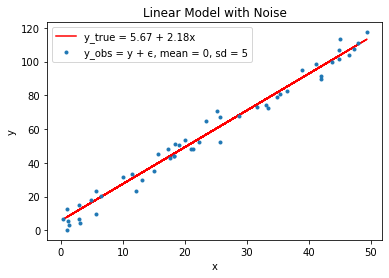

In [21]:
r_class_ols.dataPlot()

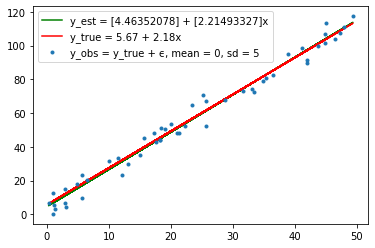

In [22]:
r_class_ols.fitPlot()

In [23]:
r_class_ols.pred([1,22,3])

array([ 6.67845405, 53.19205271, 11.10832059])

In [24]:
r_class_mle = lregression(51, 5.67, 2.18, 0, 5,'MLE', 0, 51)

In [25]:
r_class_mle.designMatrix()

matrix([[ 1.        , 20.90821724],
        [ 1.        , 28.45056892],
        [ 1.        , 48.43604983],
        [ 1.        , 22.38802165],
        [ 1.        , 32.83416043],
        [ 1.        , 14.08277891],
        [ 1.        ,  3.91497496],
        [ 1.        , 16.02219721],
        [ 1.        , 23.85221618],
        [ 1.        , 44.3908615 ],
        [ 1.        , 43.22713518],
        [ 1.        , 10.43587824],
        [ 1.        , 43.59543308],
        [ 1.        , 41.64944026],
        [ 1.        , 45.53906196],
        [ 1.        , 16.89595852],
        [ 1.        , 30.57766391],
        [ 1.        , 14.54674917],
        [ 1.        ,  5.12894431],
        [ 1.        , 34.96611508],
        [ 1.        , 32.2447739 ],
        [ 1.        , 45.9800405 ],
        [ 1.        , 24.66833494],
        [ 1.        , 26.52655454],
        [ 1.        , 47.21414969],
        [ 1.        ,  2.11381601],
        [ 1.        , 26.15596706],
        [ 1.        , 31.612

In [26]:
r_class_mle.learnParameters()

Estimated coefficients:
β_0 = [[4.8052975]]                
β_1 = [[2.23387059]]
σ^2 = [59.07344002]
Equation: y_bar ~ N([[4.8052975]] + [[2.23387059]]x; [59.07344002])


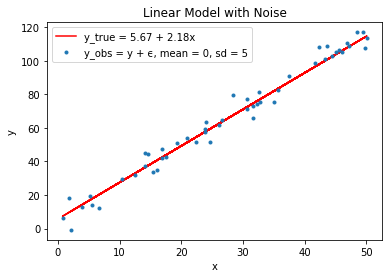

In [27]:
r_class_mle.dataPlot()

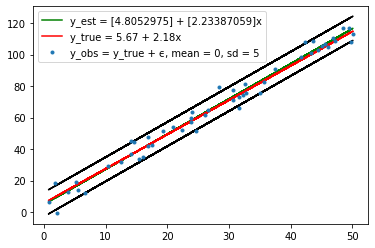

In [28]:
r_class_mle.fitPlot()

In [29]:
r_class_mle.pred([1,22,3])

array([-3.92678875, 54.05122792,  7.98244712])